In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## -Covid Confirmed prediction.

In [5]:
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv')
all_data.head(60)

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
5,5,5,6.0,83,0,2020-01-27,0.0,0.0,-1.0,5,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
6,6,6,7.0,83,0,2020-01-28,0.0,0.0,-1.0,6,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
7,7,7,8.0,83,0,2020-01-29,0.0,0.0,-1.0,7,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
8,8,8,9.0,83,0,2020-01-30,0.0,0.0,-1.0,8,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
9,9,9,10.0,83,0,2020-01-31,0.0,0.0,-1.0,9,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0


In [6]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### Plot  Spain's covid-Confiremedcases

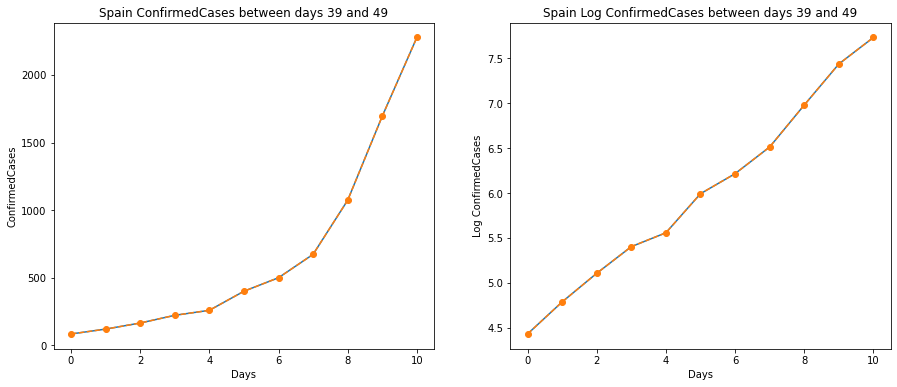

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

y = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>=39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x = [i for i in range(len(y))]
ax1.plot(x, y)

ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.plot(x, y, 'o--')

#log transform
y = np.log(all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>=39) & (all_data['Day_num']<=49)][['ConfirmedCases']])
x = [i for i in range(len(y))]
ax2.plot(x, y)

ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")

ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.plot(x, y, 'o--')


In [8]:
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

#log transformation to ConfirmedCases and Fatalities columns
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

data.replace([np.inf, -np.inf], 0, inplace=True)


### Function to  Split data into train/test and apply linear regression

In [9]:
#split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    x = df[df.ForecastId==-1]
    x_train = x.drop(['ConfirmedCases', 'Fatalities'], axis=1)
    
    y = df[df.ForecastId==-1]
    y_train_1 = y['ConfirmedCases']
    y_train_2 = y['Fatalities']
 
    x2 = df[df.ForecastId!=-1]
    x_test = x2.drop(['ConfirmedCases', 'Fatalities'], axis=1)

    
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


#linear regression model
def lin_reg(X_train, Y_train, X_test):
    regr = linear_model.LinearRegression()
    
    regr.fit(X_train, Y_train)

    y_pred =regr.predict(X_test)
    
    return regr, y_pred



In [10]:
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # df with both real cases and predictions
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    #predictions from 3.1 to 3.25
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### By Using above function'plot_linreg_basic_country', running the Linear Regression to Korea, South case

76


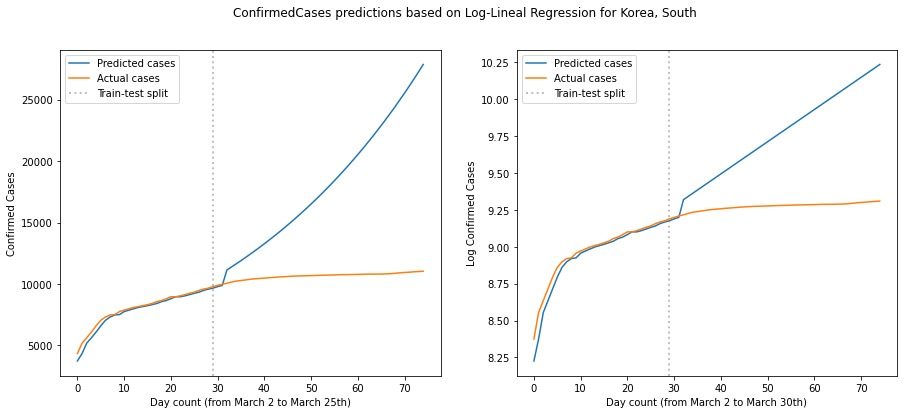

In [18]:
country_name = "Korea, South"
march_day = 1

print(len(dates_list))

dates_list2 = dates_list[march_day:]
day_start = march_day + 38

train_lim = 68
test_lim = 115

plot_linreg_basic_country(data, country_name, dates_list2, day_start, march_day, train_lim, test_lim)

## Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

## Data filtering

In [6]:
df = pd.read_csv('data/OxCGRT_latest.csv')
df.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [7]:
#target countries
filtering = df[(df.CountryName.isin(['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea']))]
print(filtering['CountryName'].unique())

['Australia' 'China' 'Japan' 'South Korea' 'New Zealand' 'Singapore']


In [8]:
CGRT = filtering[['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']]
CGRT.head()


,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN


## Calculating Stringency Index

In [9]:
#stringency calculation
N = [3, 3, 2, 4, 2, 3, 2, 2, 4]
w = 0
for j in range(len(N)-1):
    w = w+(1/(N[j]+1))
w = w/8
print(w)

0.28541666666666665


In [10]:
#calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
def SubIndices(C, G, N, w):
    sub_indices = list()
    for j in range(len(C)-1):
        sub_indice = 100*(C[j]*((1-w)/N[j]) + w*G[j])
        sub_indices.append(sub_indice)
    sub_indices.append(100*(C[-1]/N[-1]))
    return sub_indices



In [11]:
#calculate stringency index I 
def StringencyIndex(sub_indices):
    stringency = (sum(sub_indices)/9)
    return round(stringency, 2)
    

In [12]:
#make stingency index array into dataframe and concat
cgrt = CGRT.fillna(0)
stringency_index_array = list()
for i in range(len(cgrt)):
    C = [cgrt.iloc[i,2], cgrt.iloc[i,4], cgrt.iloc[i,6], cgrt.iloc[i,8], cgrt.iloc[i,10], cgrt.iloc[i,12], cgrt.iloc[i,14], cgrt.iloc[i,17], cgrt.iloc[i,16]]
    G = [cgrt.iloc[i,3], cgrt.iloc[i,5], cgrt.iloc[i,7], cgrt.iloc[i,9], cgrt.iloc[i,11], cgrt.iloc[i,13], cgrt.iloc[i,15], cgrt.iloc[i,18]]

    array = SubIndices(C, G, N, w)
    stringency_index = StringencyIndex(array)
    stringency_index_array.append(stringency_index)

CGRT['my_StringencyIndex'] = stringency_index_array
print(CGRT['my_StringencyIndex'].tail(60))

17665    37.70
17666    37.70
17667    37.70
17668    37.70
17669    37.70
17670    37.70
17671    37.70
17672    37.70
17673    37.70
17674    37.70
17675    37.70
17676    39.68
17677    39.68
17678    39.68
17679    39.68
17680    39.68
17681    39.68
17682    39.68
17683    52.64
17684    52.64
17685    52.64
17686    52.64
17687    63.75
17688    83.46
17689    83.46
17690    80.69
17691    80.69
17692    80.69
17693    80.69
17694    87.83
17695    87.83
17696    87.83
17697    87.83
17698    87.83
17699    87.83
17700    87.83
17701    87.83
17702    87.83
17703    87.83
17704    87.83
17705    87.83
17706    87.83
17707    87.83
17708    87.83
17709    87.83
17710    87.83
17711    87.83
17712    87.83
17713    87.83
17714    87.83
17715     0.00
17716     0.00
17717     0.00
17718     0.00
17719     0.00
17720     0.00
17721     0.00
17722     0.00
17723     0.00
17724     0.00
Name: my_StringencyIndex, dtype: float64


## Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19 .
- These documents were crawled from twitter with some COVID-19 related keywords .
- cluster tweets according to the latent topics with the statistical method.

In [23]:
df = pd.read_csv('data/covid_twitter.csv')
text_en = df['text']
print(df.shape)
print(df.head())
print(text_en[0])

(36121, 2)
   Unnamed: 0                                               text
0           6  .@PatriceHarrisMD spoke with @YahooFinance abo...
1          14  #CoronaUpdate | Johns Hopkins University has s...
2          17  Singapore donates 40,000 test kits to the Phil...
3          28  Lockdowns, drones: Will things ever go back to...
4          30  Does the #COVID19 pandemic have you feeling ou...
.@PatriceHarrisMD spoke with @YahooFinance about the #COVID19 stimulus package making its way through Congress and how the healthcare landscape will change once the #pandemic ends. 


### Text Preprocessing

In [24]:
for i in range(len(text_en)):
    text = re.sub('COVID19|coronavirus|coronaoutbreak|[#@,.|?!]+', '', str(text_en[i]))
    text_en[i] =text
    
   
print(text_en.head(60))

0     PatriceHarrisMD spoke with YahooFinance about ...
1     CoronaUpdate  Johns Hopkins University has sai...
2     Singapore donates 40000 test kits to the Phili...
3     Lockdowns drones: Will things ever go back to ...
4     Does the  pandemic have you feeling out-of-con...
5     Management options: antivirals glucocorticoids...
6     The Italian town of Vo went harder than most w...
7     We here at District 4 are still here to suppor...
8     Ontario’s food-security groups are getting cre...
9     Today’s Alberta : 79 more cases total 621 (12 ...
10    We MUST organize to ensure Trump is held accou...
11    In an internal document dated March 27 the inv...
12    35 years ago this is how we handled threats to...
13    We can only get through this by working togeth...
14    Peter Fricker: Governments must stamp out ille...
15    Explore Churchill War Rooms – HistoryView Virt...
16    The USDA announced a simple change to make it ...
17    China sent a plane loaded with medical per

Remove the stop words in each tweets



In [25]:
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaehun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'about', 'i', 'off', 'theirs', 'll', 've', 'mightn', 'did', 're', "weren't", 'being', 'should', 'there', 'more', 'most', 'they', "wasn't", 'its', 'further', "doesn't", "won't", 'after', 'no', 'some', "that'll", 'myself', 'wouldn', 'by', "mightn't", "didn't", 'yours', 'does', 'under', 'below', "shan't", 'once', 'he', 'yourself', 'ourselves', 'couldn', 'aren', 'm', 'had', "she's", 'am', 'over', 'why', 'as', 'where', 'ain', 'against', 'just', "shouldn't", 'this', 'then', 'ma', 'when', 'a', 'with', "it's", 'same', 'needn', 'these', 'down', 'above', 'doing', 'but', 'from', 't', 'or', 'hadn', 'herself', 'hers', 'because', 'at', 'do', 'who', 'were', 'themselves', 'so', 'our', 'few', 'into', 'been', "should've", 'haven', 'their', 'such', "wouldn't", 'of', 'both', 'than', 'y', 'the', "aren't", 'shouldn', 'very', 'that', 'it', 'those', 'up', 'again', 'ours', "hasn't", 'in', "hadn't", "you'd", 'itself', 'isn', 'all', 'how', "couldn't", 'didn', 'o', 'which', 'have', 'here', 's', 'has', 'be', 'nor

In [101]:
word = 'like'

if word in stop_words:
    print('already in')
else:
    print('not in')


not in


In [102]:
stop_words.add('would')
stop_words.add('might')
stop_words.add('get')
stop_words.add('getting')
stop_words.add('got')
stop_words.add('gotten')
stop_words.add('thing')
stop_words.add('anything')
stop_words.add('everything')
stop_words.add('nothing')
stop_words.add('something')
stop_words.add('upon')
stop_words.add('withal')
stop_words.add('onto')
stop_words.add('take')
stop_words.add('took')
stop_words.add('taken')
stop_words.add('taking')
stop_words.add('one')
stop_words.add('was')
stop_words.add('like')
print(stop_words)



{'about', 'i', 'off', 'theirs', 'll', 've', 'mightn', 'did', 're', 'getting', "weren't", 'being', 'should', 'there', 'more', 'most', 'they', "wasn't", 'its', 'further', "doesn't", 'might', "won't", 'after', 'no', 'some', "that'll", 'myself', 'wouldn', 'by', "mightn't", 'withal', "didn't", 'yours', 'taking', 'does', 'under', 'below', "shan't", 'once', 'he', 'yourself', 'ourselves', 'couldn', 'gotten', 'aren', 'like', 'm', 'got', 'had', "she's", 'am', 'over', 'why', 'as', 'where', 'ain', 'against', 'just', "shouldn't", 'this', 'then', 'ma', 'when', 'a', 'with', "it's", 'same', 'needn', 'these', 'down', 'above', 'doing', 'but', 'from', 't', 'or', 'hadn', 'herself', 'hers', 'because', 'at', 'do', 'take', 'who', 'were', 'one', 'upon', 'themselves', 'so', 'our', 'few', 'into', 'been', "should've", 'haven', 'their', 'such', "wouldn't", 'of', 'nothing', 'both', 'than', 'something', 'y', 'the', "aren't", 'shouldn', 'would', 'very', 'that', 'it', 'those', 'up', 'again', 'ours', "hasn't", 'in', "

In [103]:
for i in range(len(text_en)):
    #tokens = text_en[i].split()
    tokens = nltk.word_tokenize(text_en[i])
    new_words = list()
    for token in tokens:
        token = token.lower()
        if token not in stop_words:
            new_words.append(token)
    text_en[i] = " ".join(new_words)

df['text'] = text_en
print(df.head(60))

            

    Unnamed: 0                                               text
0            6  patriceharrismd spoke yahoofinance stimulus pa...
1           14  coronaupdate johns hopkins university said aut...
2           17      singapore donates 40000 test kits philippines
3           28  lockdowns drones : things ever go back normal ...
4           30  pandemic feeling out-of-control overwhelmed co...
5           40  management options : antivirals glucocorticoid...
6           54  italian town vo went harder testing — paid cou...
7           56  district 4 still support confront region offic...
8           62   ontario ’ food-security groups creative covid-19
9           63  today ’ alberta : 79 cases total 621 ( 12 icu ...
10          84  must organize ensure trump held accountable po...
11         105  internal document dated march 27 investindia d...
12         141  35 years ago handled threats human life cdnpol...
13         142  working together supporting office open team r...
14        

### Convert the documents to a tf-idf matrix 

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tf_idf = TfidfVectorizer()
#print(df['text'].head(60))
tf_idf_matrix = tf_idf.fit_transform(df['text'])
print(tf_idf_matrix.shape)

(36121, 66192)


### Cluster the tf-idf matrix of tweets using the K-Means algorithm.

In [109]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [110]:
ssds = list()
num_cluster = list()
for i in range(5, 105, 5):
    
    km = MiniBatchKMeans(init='k-means++', n_clusters=i, batch_size=20)
    km.fit(tf_idf_matrix)
    
    ssd = km.inertia_
    ssds.append(ssd)
    num_cluster.append(i)
    print(i, ssd)
                


5 35757.23583582234
10 35907.26132926361
15 35683.75601195016
20 35714.167908238494
25 35604.183713430444
30 35637.80730213392
35 35601.35366599604
40 35522.62292474715
45 35457.98798846489
50 35520.722607366326
55 35576.51238146778
60 35467.91797099759
65 35506.590927644356
70 35518.8464623879
75 35487.28073945132
80 35461.94060500448
85 35536.776079304116
90 35504.560734585524
95 35368.2706891088
100 35348.91712379335


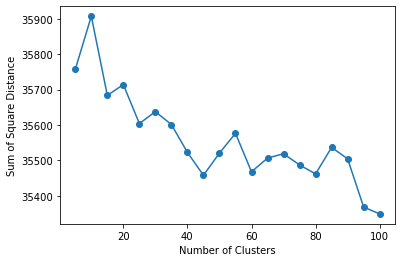

In [111]:
plt.plot(num_cluster, ssds, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

### Visualize clusters to evaluate the results of clustering analysis.

predict the label for each example

In [112]:
print(tf_idf_matrix.shape)
KM = MiniBatchKMeans(init='k-means++', n_clusters=14, batch_size=100)
KM.fit(tf_idf_matrix)
pred = KM.predict(tf_idf_matrix)
print(pred)


(36121, 66192)
[1 1 1 ... 1 1 1]


Get the PCA matrices from the results of tf-idf matrix where the number of principal components is 2

In [113]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [114]:
def plot_tsne_pca(data, labels):
    
    #initial setting and random samples pick up
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items, :].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items, :].todense()))
    
    #random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    #plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    #plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

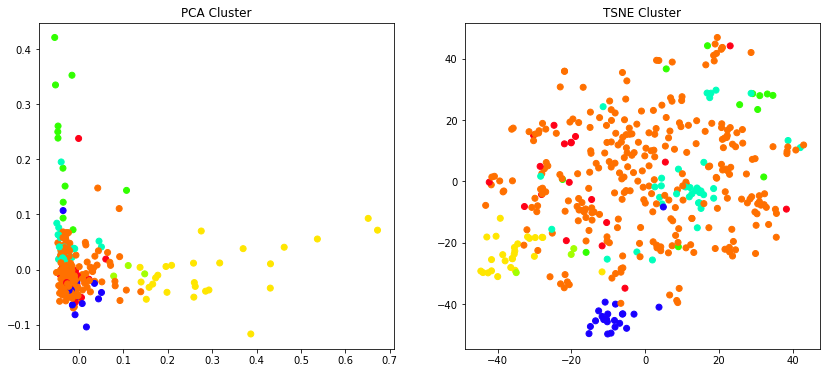

In [115]:
plot_tsne_pca(tf_idf_matrix , pred)

### Extract keywords from each clusters

The top keywords from each cluster I've got based on the tf-idf matrix values

In [116]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = number of keywords
    '''
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # print top 10 keywords of each clusters 
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [117]:
features = tf_idf.get_feature_names()
#print(features)
get_top_keywords(tf_idf_matrix, pred, features)


Cluster 0
covid2019,indiafightscornona,seemed,corona_virus,smillie_muskan,rajpoot_fact,jigu10,umasankarsamal,poplipromila,stayhomesavelives

Cluster 1
new,trump,help,covid_19,pandemic,us,covid19,people,coronavirus,amp

Cluster 2
reports,coronavirus,number,bringing,reported,confirmed,deaths,new,total,cases

Cluster 3
says,anthony,could,millions,dr,200000,100000,us,fauci,deaths

Cluster 4
help,spread,amp,staying,people,covid_19,please,safe,home,stay

Cluster 5
live,ca,tv,becoming,citizen,reporter,eldoret,slowly,langas,scaryeldoret

Cluster 6
corona,people,coronavirus,whencoronavirusisover,quarantine,lockdown,coronalockdown,coronaupdate,stayathomeandstaysafe,covid_19

Cluster 7
done,set,campaign,awareness,college,sciences,veterinary,mekelle,abrhish1,mekunieth

Cluster 8
wonderful,uklockdown,10pm,outs,pants,wives,husbands,rings,poo,shout

Cluster 9
new,positive,patients,covid19,pandemic,cases,covid_19,coronavirus,19,covid

Cluster 10
evil,evidencebase,evilangelvideo,evildead,evilgrrl,evil